# AGAR -  Molecular genetic and genomic analysis of gene variants 
## 8/2/2018 14:00 - 15:15
### Notebook written by R. Antonio Herrera, Ph.D.
#### Code based on the biopython cookbook
http://biopython.org/DIST/docs/tutorial/Tutorial.html


### Instructions for pythonanywhere

Registration and workshop instructions are available on this graphic: 

Step 1. Navigate to https://www.pythonanywhere.com/?affiliate_id=003df78d

Step 2. Click  “Start running Python online in less than a minute!”

Step 3. Create a Beginner account

Step 4. Click “Account”

Step 5. Click “Teacher” tab

Step 6. Enter “rah” as your teacher’s username.


In [44]:
import IPython
iframe = '<iframe src="https://drive.google.com/file/d/1z0c-q-srnKphD5Pv2FFwYVip3e4SC5n5/preview" height="640"></iframe>'
IPython.display.HTML(iframe)

### After registering and designating 'rah' as Teacher is completed:

In [73]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

# AGAR - Sources of Variation

In [46]:
# AGAR workshop script to analyze motifs
from Bio import motifs
from Bio.Seq import Seq

# suppose we have sequences for motifs of a given transcription factor binding site
instances = [Seq("TACAA"), Seq("TACGC"), Seq("TACAC"), Seq("TACCC"), Seq("AACCC"), Seq("AATGC"), Seq("AATGC")]

# using the motifs module create m motifs of the instances of the sequences
m = motifs.create(instances)

# print all motifs
print(m)

# nucleotide counts can be accessed on whole
print(m.counts)

# or by nucleotide, by using the base name as the dict key
print(m.counts['A'])

# or access all elements in the first two positions of the motifs
print(m.counts[:,0:1])

TACAA
TACGC
TACAC
TACCC
AACCC
AATGC
AATGC

        0      1      2      3      4
A:   3.00   7.00   0.00   2.00   1.00
C:   0.00   0.00   5.00   2.00   6.00
G:   0.00   0.00   0.00   3.00   0.00
T:   4.00   0.00   2.00   0.00   0.00

[3, 7, 0, 2, 1]
        0
A:   3.00
C:   0.00
G:   0.00
T:   4.00



In [47]:
from Bio import Entrez
Entrez.email = "your@email.com"
handle = Entrez.einfo()
record =  Entrez.read(handle)
record.keys()
for l in record['DbList']:
    print(l)

pubmed
protein
nuccore
ipg
nucleotide
nucgss
nucest
structure
sparcle
genome
annotinfo
assembly
bioproject
biosample
blastdbinfo
books
cdd
clinvar
clone
gap
gapplus
grasp
dbvar
gene
gds
geoprofiles
homologene
medgen
mesh
ncbisearch
nlmcatalog
omim
orgtrack
pmc
popset
probe
proteinclusters
pcassay
biosystems
pccompound
pcsubstance
pubmedhealth
seqannot
snp
sra
taxonomy
biocollections
unigene
gencoll
gtr


In [48]:
from Bio import Entrez
import time
Entrez.email ="eigtw59tyjrt403@gmail.com"
## We instead upload the list of ID beforehand 
epas1_id = 'U81984.1'
gis=[epas1_id]
request = Entrez.epost("nucleotide",id=",".join(map(str,gis)))
result = Entrez.read(request)
webEnv = result["WebEnv"]
queryKey = result["QueryKey"]
handle = Entrez.efetch(db="nucleotide",retmode="xml", webenv=webEnv, query_key=queryKey)
results = []
for r in Entrez.parse(handle):
    # Grab the GI 
    try:
        gi=int([x for x in r['GBSeq_other-seqids'] if "gi" in x][0].split("|")[1])
    except ValueError:
        gi=None
    print(">GI ",gi," "+r["GBSeq_primary-accession"]+" "+r["GBSeq_definition"]+"\n")
    results.append(r)
# for key in r.keys():
#     print(key)
print('Epas1 genomic sequence,', results[0]['GBSeq_sequence'][0:60])

>GI  1805267  U81984 Human endothelial PAS domain protein 1 (EPAS1) mRNA, complete cds

Epas1 genomic sequence, cctgactgcgcggggcgctcgggacctgcgcgcacctcggaccttcaccacccgcccggg


In [51]:
epas1_dna = r['GBSeq_sequence']

In [52]:
from Bio.Blast import NCBIWWW

result_handle = NCBIWWW.qblast("blastn", "nt", str(epas1_id))

with open(str(epas1_id) + "_blast.xml", "w") as out_handle:
    out_handle.write(result_handle.read())

result_handle.close()

In [53]:
result_handle = open(str(epas1_id) + "_blast.xml")

from Bio.Blast import NCBIXML
blast_records = NCBIXML.read(result_handle)
E_VALUE_THRESH = 0.04

for alignment in blast_records.alignments:
    for hsp in alignment.hsps:
        if hsp.expect < E_VALUE_THRESH:
            print('****Alignment****')
            print('sequence:', alignment.title)
            print('length:', alignment.length)
            print('e value:', hsp.expect)
            print(hsp.query[0:75] + '...')
            print(hsp.match[0:75] + '...')
            print(hsp.sbjct[0:75] + '...')
            
from Bio import SearchIO     
blast_qresult = SearchIO.read(str(epas1_id) + "_blast.xml", 'blast-xml')

# print(blast_qresult)
blast_hit = blast_qresult[3]
print(blast_hit)

****Alignment****
sequence: gi|1805267|gb|U81984.1|HSU81984 Human endothelial PAS domain protein 1 (EPAS1) mRNA, complete cds
length: 2818
e value: 0.0
CCTGACTGCGCGGGGCGCTCGGGACCTGCGCGCACCTCGGACCTTCACCACCCGCCCGGGCCGCGGGGAGCGGAC...
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||...
CCTGACTGCGCGGGGCGCTCGGGACCTGCGCGCACCTCGGACCTTCACCACCCGCCCGGGCCGCGGGGAGCGGAC...
****Alignment****
sequence: gi|262527236|ref|NM_001430.4| Homo sapiens endothelial PAS domain protein 1 (EPAS1), mRNA
length: 5184
e value: 0.0
CCTGACTGCGCGGGGCGCTCGGGACCTGCGCGCACCTCGGACCTTCACCACCCGCCCGGGCCGCGGGGAGCGGAC...
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||...
CCTGACTGCGCGGGGCGCTCGGGACCTGCGCGCACCTCGGACCTTCACCACCCGCCCGGGCCGCGGGGAGCGGAC...
****Alignment****
sequence: gi|30410994|gb|BC051338.1| Homo sapiens endothelial PAS domain protein 1, mRNA (cDNA clone MGC:59860 IMAGE:6305604), complete cds
length: 5011
e value: 0.0
CCTGACTGCGCGGGGCGCTCGGGACCTGCGCGCACCTCGGACCTTC

In [54]:
from Bio import motifs
from Bio.Seq import Seq
instances = [Seq("TACAA"),
              Seq("TACGC"),
              Seq("TACAC"),
              Seq("TACCC"),
              Seq("AACCC"),
              Seq("AATGC"),
              Seq("AATGC"),
             ]

m = motifs.create(instances)
print(m)
print(m.counts)

print(m.consensus)

print(m.anticonsensus)

m.weblogo("mymotif.png",kwargs=['stack_width:medium','stacks_per_line:40','alphabet:alphabet_dna','ignore_lower_case:True','unit_name:bits','first_index:1',
'logo_start:1',
'composition:comp_auto',
'show_xaxis:False',
'show_yaxis:False',
'yaxis_scale:auto',
'yaxis_tic_interval:1.0',
'color_scheme:color_auto',])




TACAA
TACGC
TACAC
TACCC
AACCC
AATGC
AATGC

        0      1      2      3      4
A:   3.00   7.00   0.00   2.00   1.00
C:   0.00   0.00   5.00   2.00   6.00
G:   0.00   0.00   0.00   3.00   0.00
T:   4.00   0.00   2.00   0.00   0.00

TACGC
GGGTG


### Expasy Prosite

In [55]:
from Bio import ExPASy
from Bio import SwissProt
accessions = ["Q99814"]
for accession in accessions:
    handle = ExPASy.get_sprot_raw(accession)
    record = SwissProt.read(handle)
    handle = ExPASy.get_sprot_raw(accession)
    text= handle.read()
# print(text)    
data = [x.strip() for x in text.split('\n')]
aa = data[-17:]
AA = ''
for a in aa:
    AA = str(AA) + str(a)
AA = AA.split(' ')
new_aa = ''.join(AA)[0:-2]
print('Epas1 amino acid sequence:\n'+str(new_aa))

Epas1 amino acid sequence:
MTADKEKKRSSSERRKEKSRDAARCRRSKETEVFYELAHELPLPHSVSSHLDKASIMRLAISFLRTHKLLSSVCSENESEAEADQQMDNLYLKALEGFIAVVTQDGDMIFLSENISKFMGLTQVELTGHSIFDFTHPCDHEEIRENLSLKNGSGFGKKSKDMSTERDFFMRMKCTVTNRGRTVNLKSATWKVLHCTGQVKVYNNCPPHNSLCGYKEPLLSCLIIMCEPIQHPSHMDIPLDSKTFLSRHSMDMKFTYCDDRITELIGYHPEELLGRSAYEFYHALDSENMTKSHQNLCTKGQVVSGQYRMLAKHGGYVWLETQGTVIYNPRNLQPQCIMCVNYVLSEIEKNDVVFSMDQTESLFKPHLMAMNSIFDSSGKGAVSEKSNFLFTKLKEEPEELAQLAPTPGDAIISLDFGNQNFEESSAYGKAILPPSQPWATELRSHSTQSEAGSLPAFTVPQAAAPGSTTPSATSSSSSCSTPNSPEDYYTSLDNDLKIEVIEKLFAMDTEAKDQCSTQTDFNELDLETLAPYIPMDGEDFQLSPICPEERLLAENPQSTPQHCFSAMTNIFQPLAPVAPHSPFLLDKFQQQLESKKTEPEHRPMSSIFFDAGSKASLPPCCGQASTPLSSMGGRSNTQWPPDPPLHFGPTKWAVGDQRTEFLGAAPLGPPVSPPHVSTFKTRSAKGFGARGPDVLSPAMVALSNKLKLKRQLEYEEQAFQDLSGGDPPGGSTSHLMWKRMKNLRGGSCPLMPDKPLSANVPNDKFTQNPMRGLGHPLRHLPLPQPPSAISPGENSKSRFPPQCYATQYQDYSLSSAHKVSGMASRLLGPSFESYLLPELTRYDCEVNVPVLGSSTLLQGGDLLRALDQAT


In [86]:
from pysb import *
from pysb import pathfinder

pathfinder.set_path('bng', '/home/rantonioh/BioNetGen-2.3.1/')
pathfinder.get_path('bng')

'/home/rantonioh/BioNetGen-2.3.1/BNG2.pl'

In [87]:
Model()


# Physical and geometric constants
Parameter('NA', 6.0e23)      # Avogadro's num
Parameter('f', 0.01)         # scaling factor
Expression('Vo', f * 1e-10)  # L
Expression('V', f * 3e-12)   # L

# Initial concentrations
Parameter('EGF_conc', 2e-9)             # nM
Expression('EGF0', EGF_conc * NA * Vo)  # nM
Expression('EGFR0', f * 1.8e5)          # copy per cell

# Rate constants
Expression('kp1', 9.0e7 / (NA * Vo))  # input /M/sec
Parameter('km1', 0.06)                # /sec


Monomer('EGF', ['R'])
Monomer('EGFR', ['L', 'CR1', 'Y1068'], {'Y1068': ['U', 'P']})


Initial(EGF(R=None), EGF0)
Initial(EGFR(L=None, CR1=None, Y1068='U'), EGFR0)


Rule('egf_binds_egfr', EGF(R=None) + EGFR(L=None) | EGF(R=1) % EGFR(L=1), kp1, km1)


# Species LR EGF(R!1).EGFR(L!1)
Observable('Lbound', EGF(R=ANY))  # Molecules

Observable('Lbound', EGF(R=ANY))

In [88]:
from pysb.integrate import Solver

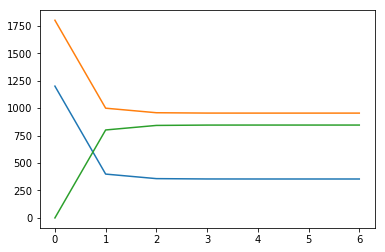

In [89]:
t = [0, 10, 20, 30, 40, 50, 60]
solver = Solver(model, t)
solver.run()
# print(solver.y[:, 1])
import matplotlib.pyplot as plt
plt.plot(solver.y)
plt.show()
plt.close()

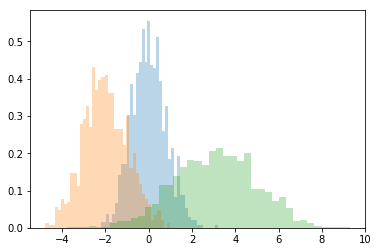

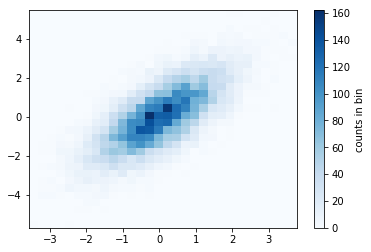

In [70]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);
plt.show()
plt.close()


mean = [0, 0]

cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [78]:
def convert_time(s):
            h, m, s = map(int, s.split(':'))
            return pd.datetools.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('/home/rah/marathon-data.csv',converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [79]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [81]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


In [83]:
import seaborn as sns
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

ModuleNotFoundError: No module named 'seaborn'